# Generate 2D Data for Introductory Tutorial
> Created Aug. 2024 for the FSU Course: *Machine Learning in Physics* H. B. Prosper<br>
<!-- 
<img src="./perceptron.png" align="left" width="400px"/> The output $y$ and the 
<br clear="left"/>
 -->
## Tips

  * Use __esc r__ to disable a cell
  * Use __esc y__ to reactivate it
  * Use __esc m__ to go to markdown mode. **Markdown** is the typesetting language used in jupyter notebooks.
  * In a markdown cell, double tap the mouse or glide pad (on your laptop) to go to edit mode. 
  * Shift + return to execute a cell (including markdown cells).
  * If the equations don't typeset, try double tapping the cell again, and re-execute it.

## Import modules 

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st

# standard plotting module
import matplotlib as mp
import matplotlib.pyplot as plt

# make plots appear inline
%matplotlib inline

# update fonts
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 14
        }
mp.rc('font', **font)
mp.rc('xtick', labelsize='x-small')
mp.rc('ytick', labelsize='x-small')

# set usetex = False if Latex is not available on your system
mp.rc('text', usetex=True)

# set a seed to ensure reproducibility 
# on a given machine
seed = 111
rnd = np.random.RandomState(seed)

## Generate data

(-1.0, -1.0, 1.0, 1.0, (201, 201, 2))

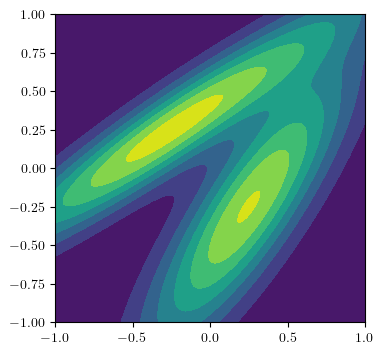

In [2]:
FGSIZE = (4, 4)
XMIN = -1
XMAX =  1

YMIN = -1
YMAX =  1
STEP = 0.01

XMEAN1 =  0.25
YMEAN1 = -0.25

XMEAN2 = -0.25
YMEAN2 =  0.25

rv1 = st.multivariate_normal(mean=[XMEAN1, YMEAN1], 
                            cov=[[0.2, 0.24], 
                                 [0.24, 0.4]])
x, y = np.mgrid[XMIN:XMAX+STEP:STEP, YMIN:YMAX+STEP:STEP]
pos = np.dstack((x, y))


rv2 = st.multivariate_normal(mean=[XMEAN2, YMEAN2], 
                            cov=[[0.6,  0.40], 
                                 [ 0.40, 0.3]])

fig = plt.figure(figsize=FGSIZE)
ax  = fig.add_subplot(111)
ax.contourf(x, y, rv1.pdf(pos)+rv2.pdf(pos))

x[0,0], y[0,0], x[-1,-1], y[-1,-1], pos.shape

In [3]:
T = 50000
d1 = rv1.rvs(T)
d2 = rv2.rvs(T)
d1.shape

(50000, 2)

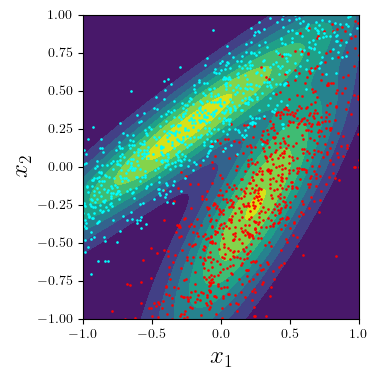

In [4]:
fig = plt.figure(figsize=FGSIZE)

ax  = fig.add_subplot(111)

ax.set_xlim(XMIN, XMAX)
ax.set_xlabel(r'$x_1$', fontsize=18)

ax.set_ylim(YMIN, YMAX)
ax.set_ylabel(r'$x_2$', fontsize=18)

ax.contourf(x, y, rv1.pdf(pos)+rv2.pdf(pos))
xp, yp = d1[:1000,0], d1[:1000,1]
ax.scatter(xp, yp, s=0.8, color='red')

xp, yp = d2[:1000,0], d2[:1000,1]
ax.scatter(xp, yp, s=0.8, color='cyan');

fig.tight_layout()

plt.savefig('two2dnormals.png')

In [5]:
ones = np.ones(T)[:, np.newaxis]
zeros= np.zeros(T)[:, np.newaxis]
dd1 = np.hstack([d1,ones])
dd2 = np.hstack([d2,zeros])

In [6]:
dd = np.vstack([dd1, dd2])
dd[:5]

array([[-0.05002168, -0.2414044 ,  1.        ],
       [ 0.91415784,  1.36654023,  1.        ],
       [ 0.44939872,  0.34391191,  1.        ],
       [-0.19096374, -0.51020106,  1.        ],
       [ 0.0720723 , -0.3504074 ,  1.        ]])

In [7]:
np.random.shuffle(dd)
dd[:5]

array([[ 0.57305837,  0.80680228,  0.        ],
       [ 0.43998159,  0.5751531 ,  0.        ],
       [-0.22267046, -0.91626699,  1.        ],
       [-0.34948318,  0.60300504,  0.        ],
       [ 0.79704612,  0.61602114,  1.        ]])

In [8]:
df = pd.DataFrame(dd, columns=['x1', 'x2', 'target'])
df[:10]

,x1,x2,target
0,0.573058,0.806802,0.0
1,0.439982,0.575153,0.0
2,-0.222670,-0.916267,1.0
3,-0.349483,0.603005,0.0
4,0.797046,0.616021,1.0
5,-1.392834,-0.293670,0.0
6,0.379199,0.014612,1.0
7,-1.113770,-0.075073,0.0
8,0.817277,0.638575,1.0
9,0.056809,-0.512619,1.0


In [9]:
df.to_csv('../data/two2dnormals.cvs', index=False)

In [10]:
len(df)

100000